### I) load dataset 

In [ ]:
import seaborn as sbn

import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [12]:
import pandas as pd
df = pd.read_csv("../data/creditData.csv", index_col=[0])

In [13]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


### II) plotting BOxplot

<Axes: ylabel='Credit amount'>

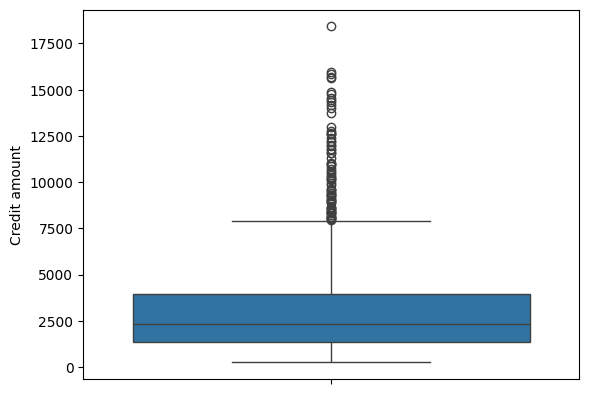

In [14]:
import seaborn as sns
sbn.boxplot(df['Credit amount'])

### II) basic Statistics related to Boxplot 

In [22]:
# 1st , 2nd, 3rd Quantile
Q1= df['Credit amount'].quantile(.25)
Q2= df['Credit amount'].quantile(.5)
Q3= df['Credit amount'].quantile(.75)

print(f" First Quantile  Q1: {Q1}")
print(f" Median / 2nd  Quantile Q2 : {Q2}")
print(f" 3rd Quantile  Q3 : {Q3}")


 First Quantile  Q1: 1365.5
 Median / 2nd  Quantile Q2 : 2319.5
 3rd Quantile  Q3 : 3972.25


In [25]:
# inter Quantile 
IQR = Q3-Q1
print(f" Inter  Quantile  IQR : {IQR} ")

 Inter  Quantile  IQR : 2606.75 


In [28]:
#    determin Whiskers  : Max, Min  values,
Max_Whiskers =   Q1 + (1.5 * IQR)
Min_Whiskers =   Q1 - (1.5 * IQR)
print( f" Max_Whiskers :   {Max_Whiskers}")
print( f" MIN_Whiskers :   {Min_Whiskers}")

 Max_Whiskers :   5275.625
 MIN_Whiskers :   -2544.625


### III) outliers

In [31]:
df[(df["Credit amount"] < Min_Whiskers) |(df["Credit amount"] > Max_Whiskers)]


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,female,2,own,little,moderate,5951,48,radio/TV
3,45,male,2,free,little,little,7882,42,furniture/equipment
5,35,male,1,free,NaN,NaN,9055,36,education
7,35,male,3,rent,little,moderate,6948,36,car
17,25,male,2,own,NaN,little,8072,30,business
...,...,...,...,...,...,...,...,...,...
973,36,male,2,rent,little,little,7297,60,business
980,49,male,2,own,little,moderate,8386,30,furniture/equipment
983,26,male,2,own,little,little,8229,36,car
986,33,male,2,own,little,rich,6289,42,business


### 6.select only data whithin max and Min Whiskers 

In [32]:
df[~((df["Credit amount"] < Min_Whiskers) |(df["Credit amount"] > Max_Whiskers))]


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
4,53,male,2,free,little,little,4870,24,car
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
8,61,male,1,own,rich,NaN,3059,12,radio/TV
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV
